Import headers and scripts

In [11]:
from import_data import *
from noise_models import *
from neural_network_with_bins import *
from Branch_flow_xy_split import *
# from generate_xy import *
import numpy as np
import matplotlib.pyplot as plt
# from volt_to_p_est import *
# from VI_to_P import *
# from linear_models import *
from feature_bins import std_bins_bflow
from IPython.display import clear_output

#%% importing single hour imag dataset
VM, VA, bflow, Pinj, Qinj, CFM, CFA, CTM, CTA = import_curr_branch_data()

Import data, get input- output combo

In [12]:
def data(addbus=[]):
#%% Getting X and Y 
    x_vm, x_va, x_cm, x_ca,  ytot = branch_flow_VI_split(bflow, VM, VA, CFM, CFA, CTM, CTA, Pinj, Qinj, num_bus = 11, add_bus = addbus)
    #%% Adding noise 
    x_vm_n = NoisyMag(x_vm)
    x_va_n = NoisyAng(x_va)
    # bflow_n = noise_gaussian(X, range1, mu1)
    # bflow_n = NoisyMag(x_bflow.values)
    x_cm_n = NoisyMag(x_cm)
    x_ca_n = NoisyAng(x_ca)

    # X_p = VI_to_P(x_vm_n, x_va_n, x_cm_n, x_ca_n, num_bus = 11, add_bus = [])
    X_v = np.concatenate((x_vm_n, x_va_n, x_cm_n, x_ca_n), axis=1)
    Y_p = ytot
    return X_v, Y_p

31.081381882947607 %
17.524034549921183 %
10.370536515007514 %
0.09084412905759946 %
0.06117598409355125 %


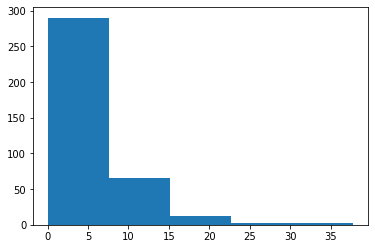

In [13]:
X,y = data()
std_b = [np.std(y[:,i]) for i in range(y.shape[1])]
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# fig.suptitle('Histogram and bus wise std')
# ax1.hist(std_b, bins = 5)
# ax2.bar(np.arange(y.shape[1])+1, sorted(std_b))
branch_list = std_bins_bflow(std_b, 5)

Network 1: V_I input, V output 
Checking Power injection error

In [14]:
def PICDNN(X_v, Y_p, Pinj, Qinj):
    # X_v, Y_p = data()
    dnn = Deep_Network(layers=3, nodes=int(X_v.shape[1]*1.1), lr = 1e-3, epoch = 100,
                    batch_norm = True, dropout = 0, branch_list=branch_list)

    # dnn.y_normalise = True
    mse, mape, r2 = dnn.model_parse(X_v,Y_p,Pinj, Qinj, ntest=1)
    # clear_output()
    return np.mean(np.sqrt(mse))

CODE for best bus search

In [16]:
pmu_loc = {
    11: [8, 9, 10, 26, 30, 38, 63, 64, 65, 68, 81] ,
    13: [8, 9, 10, 26, 30, 38, 63, 64, 65, 68, 81, 87, 111] ,
    32: [1, 5, 9, 12,13,17,21,23,26,28,34,37,41,45,49,53,56,62,63,68,71,75,77,80,85,86,90,94,101,105,110,114],
    118: np.arange(1,119)
}

bus_list_11 = pmu_loc[11]
bus_list_32 = pmu_loc[118]

r2_lin = [0 for i in range(21)]
mse_lin = [0 for i in range(21)]

r2_dnn = [0 for i in range(21)]
mse_dnn = [0 for i in range(21)]

full_bus = bus_list_11
# add_bus = [118, 47, 94, 93, 20, 2, 18, 5, 101, 19, 67, 57]
add_bus = []
best_bus = -1000
best_r2 = -1000


for i in range(21-len(add_bus)):
    print(i)
    left_buses = [bus for bus in bus_list_32 if bus not in full_bus]
    best_mse = 1000
    for bus in left_buses:
        
        add_bus_i = add_bus.copy()
        add_bus_i.append(bus)
        # print(add_bus_i)
        X_v, Y_p  = data(add_bus_i)
        rmse = PICDNN(X_v, Y_p, Pinj, Qinj)
        print('iteration', i, 'bus', bus,'rmse = ', rmse, 'best buses = ', add_bus)
        # clear_output()
        # print(add_bus)
        if np.mean(rmse)<best_mse:
            best_mse = np.mean(rmse)
            best_bus = bus
            # best_r2 = np.mean(r2_inst)
            
    add_bus.append(best_bus)
    full_bus.append(best_bus)
    # r2_dnn[i] = best_r2
    mse_dnn[i] = best_mse

0
iteration 0 bus 1 rmse =  4.883345066247619 best buses =  []
iteration 0 bus 2 rmse =  4.909916627676 best buses =  []
iteration 0 bus 3 rmse =  4.871043029755416 best buses =  []
iteration 0 bus 4 rmse =  4.819930425733484 best buses =  []
iteration 0 bus 5 rmse =  4.7664061982349715 best buses =  []
iteration 0 bus 6 rmse =  4.8361987112041716 best buses =  []
iteration 0 bus 7 rmse =  4.85608934665308 best buses =  []
iteration 0 bus 11 rmse =  4.749470076820972 best buses =  []
iteration 0 bus 12 rmse =  4.729427241581733 best buses =  []
iteration 0 bus 13 rmse =  4.859904765552206 best buses =  []
iteration 0 bus 14 rmse =  4.939593487727586 best buses =  []
iteration 0 bus 15 rmse =  4.798252983828266 best buses =  []
iteration 0 bus 16 rmse =  4.876270731746609 best buses =  []
iteration 0 bus 17 rmse =  4.756734695626359 best buses =  []
iteration 0 bus 18 rmse =  4.882699624922744 best buses =  []
iteration 0 bus 19 rmse =  4.828182584217689 best buses =  []
iteration 0 bus